<a href="https://colab.research.google.com/github/FelipeSilvieri/projeto-image-classification/blob/main/Projeto_Semestral_Dados_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de Potencial Engajamento no Instagram de Imagens com Redes Neurais Convolucionais (CNN)**

> Felipe Matos Silvieri             20.00314-5

> Gabriel dos Santos Couto          20.00273-4

> Gabriel Prande Bernadello         20.01288-8

## Introdução

Este projeto visa desenvolver um modelo de Machine Learning capaz de prever o potencial de engajamento de imagens no Instagram. Para isso, utilizaremos uma Rede Neural Convolucional (CNN), que é uma técnica eficaz em tarefas de classificação de imagens, para classificar o potencial de engajamento de uma imagem em uma escala de notas (de 1 a 5, por exemplo).

<table>
  <tr>
    <td>
      <img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*HMP8TthpVRljInDPoNHS5A.jpeg" alt="CNN - Convolutional Neural Network" width="800">
    </td>
    <td>
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/225px-Instagram_logo_2022.svg.png" alt="Instagram Logo" width="200">
    </td>
  </tr>
</table>


## Contexto

Com o crescimento das redes sociais, o engajamento tornou-se uma métrica fundamental para medir o impacto e a relevância do conteúdo. No Instagram, o engajamento de uma postagem (como uma imagem) depende de diversos fatores, incluindo a qualidade visual, a popularidade do perfil e as preferências dos seguidores. Compreender quais características contribuem para o aumento de engajamento é de interesse tanto para criadores de conteúdo quanto para analistas de mídia social.

## Desafio

Classificar o potencial de engajamento de imagens no Instagram é um desafio, pois envolve características visuais complexas que podem influenciar a interação dos usuários. Além disso, perfis diferentes apresentam escalas de engajamento variadas, o que requer um processo de normalização dos dados para garantir comparabilidade entre as imagens.

## Metodologia

A metodologia deste projeto envolve várias etapas:

- **Coleta de Dados:** Utilizaremos uma ferramenta externa chamada Apify para realizar o web scraping de perfis no Instagram. Coletaremos dados de imagens, número de curtidas, comentários e metadados como data de postagem e aspect ratio.
- **Processamento dos Dados:** Calcularemos uma métrica de engajamento com base nas curtidas e comentários, e faremos a normalização dos dados para garantir uma escala uniforme entre perfis.
- **Treinamento e Avaliação do Modelo:** Usaremos uma CNN para classificar as imagens de acordo com seu potencial de engajamento. Modelos pré-treinados serão ajustados e utilizados para melhorar a precisão do modelo.
- **Implementação:** O modelo será implementado em uma interface interativa utilizando ferramentas como Streamlit e Google Colab, para facilitar a visualização e teste dos resultados.

## Justificativa

A previsão de engajamento é uma área de crescente interesse em ciência de dados aplicada ao marketing digital. Esse projeto visa contribuir para esse campo, desenvolvendo uma ferramenta que permita aos criadores e analistas de conteúdo entenderem melhor os fatores visuais que impactam o engajamento das postagens.

# Processo de Desenvolvimento

## Captação dos Dados

> Para realizar a coleta de dados, utilizamos o Apify, uma plataforma que oferece serviços de automação e scraping para diversas aplicações. Entre elas, a ferramenta 'Instagram Scraper' permite extrair dados públicos de perfis no Instagram de maneira prática e organizada, sem a necessidade de desenvolver um script de scraping do zero.

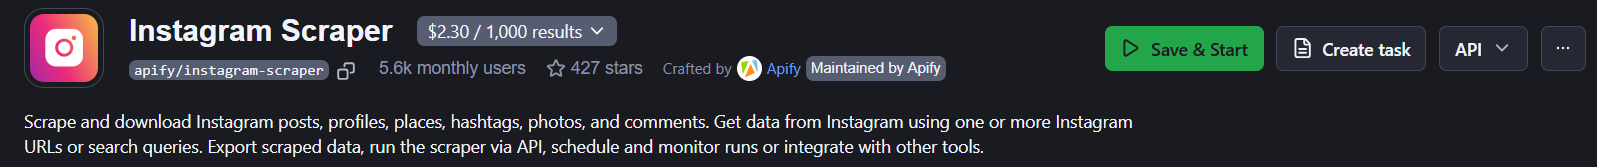

O processo de captação dos dados envolveu a seguinte ordem:
- Definir Nicho (Foi escolhido o nicho de Fotografia geral (geralmente de paisagens e natureza))
- Pesquisar Perfis do Nicho
- Selecionar Perfis que possuem uma quantidade significativa de imagens
- Utilizar a ferramenta do Apify para realizar o *scraping*
- Salvar todos os resultados como JSON, separados pra cada perfil "varrido"


## Transformações nos Dados

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
json_path = '/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Dados JSON'

In [ ]:
import json
import pandas as pd
import os

# Caminhos
input_directory = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Dados JSON/"
output_directory = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/"

# Criar o diretório de saída, caso não exista
os.makedirs(output_directory, exist_ok=True)

# Processar todos os arquivos JSON no diretório de entrada
for file_name in os.listdir(input_directory):
    if file_name.endswith(".json"):
        input_path = os.path.join(input_directory, file_name)

        # Ler o arquivo JSON
        with open(input_path, "r", encoding="utf-8") as file:
            data = json.load(file)

        # Lista para armazenar os resultados
        result = []

        # Iterar sobre os itens no JSON
        for item in data:
            parsed_item = {
                "display_url": item.get("displayUrl", ""),
                "hashtags_count": len(item.get("hashtags", [])),
                "comments_count": item.get("commentsCount", 0),
                "dimensions_height": item.get("dimensionsHeight", 0),
                "dimensions_width": item.get("dimensionsWidth", 0),
                "likes_count": item.get("likesCount", 0),
                "timestamp": item.get("timestamp", "")
            }
            result.append(parsed_item)

        # Converter a lista de resultados para um DataFrame
        df = pd.DataFrame(result)

        # Salvar o DataFrame em um arquivo CSV com o nome no formato desejado
        output_file_name = f"{os.path.splitext(file_name)[0]}_parsed.csv"
        output_path = os.path.join(output_directory, output_file_name)
        df.to_csv(output_path, index=False, encoding="utf-8")
        print(f"Arquivo processado e salvo: {output_path}")

print(f"Todos os arquivos foram processados e salvos em: {output_directory}")


Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/ig_shotz_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/marcoscaballero.es_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/southoptic_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/samuel_lesko_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/photos_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/travelostly_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/traveling_globee_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/marshallcody_photo_parsed.csv
Arquivo proce

In [ ]:
import pandas as pd
import os

# Diretório onde os CSVs estão armazenados
csv_directory = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/"

# Dicionário para armazenar os DataFrames
dataframes = {}

# Iterar sobre todos os arquivos CSV no diretório
for file_name in os.listdir(csv_directory):
    if file_name.endswith(".csv"):
        # Criar o caminho completo do arquivo
        file_path = os.path.join(csv_directory, file_name)

        # Carregar o CSV como DataFrame
        df = pd.read_csv(file_path)

        # Usar o nome do arquivo (sem extensão) como chave
        profile_name = os.path.splitext(file_name)[0]
        dataframes[profile_name] = df

# Exibir as chaves do dicionário para verificar
print(f"Perfis carregados: {list(dataframes.keys())}")


Perfis carregados: ['ig_shotz_parsed', 'marcoscaballero.es_parsed', 'southoptic_parsed', 'samuel_lesko_parsed', 'photos_parsed', 'travelostly_parsed', 'traveling_globee_parsed', 'marshallcody_photo_parsed', 'sentiers_de_bretagne_parsed', 'tomkingsford_parsed']


In [ ]:
ig_shotz.head()

,display_url,hashtags_count,comments_count,dimensions_height,dimensions_width,likes_count,timestamp
0,https://scontent-mad2-1.cdninstagram.com/v/t51...,30,28,1349,1080,2611,2024-11-05T12:17:25.000Z
1,https://scontent-sjc3-1.cdninstagram.com/v/t51...,30,15,1346,1080,1185,2024-11-07T11:33:11.000Z
2,https://scontent-lax3-2.cdninstagram.com/v/t51...,29,5,1350,1080,568,2024-11-07T19:31:09.000Z
3,https://instagram.fcgk18-1.fna.fbcdn.net/v/t51...,29,17,1348,1080,1163,2024-11-05T22:28:23.000Z
4,https://scontent-lax3-2.cdninstagram.com/v/t51...,29,21,1338,1080,1194,2024-11-06T22:20:36.000Z


### Download das Imagens

In [ ]:
import json
import requests
import os

# Caminho do arquivo JSON
file_path = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Dados JSON/ig_shotz.json"

# Caminho para salvar as imagens
save_path = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Dados Imagens/"

# Criar o diretório, caso não exista
os.makedirs(save_path, exist_ok=True)

# Ler o arquivo JSON
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# Iterar sobre as URLs de display e baixar as imagens
for index, item in enumerate(data):
    display_url = item.get("displayUrl", "")
    if display_url:
        try:
            # Fazer o download da imagem
            response = requests.get(display_url, stream=True)
            response.raise_for_status()  # Verificar se houve algum erro na requisição

            # Criar o caminho completo para salvar a imagem
            file_name = f"image_{index + 1}.jpg"
            file_path = os.path.join(save_path, file_name)

            # Salvar a imagem
            with open(file_path, "wb") as img_file:
                for chunk in response.iter_content(1024):
                    img_file.write(chunk)

            print(f"Imagem {file_name} salva com sucesso.")
        except Exception as e:
            print(f"Erro ao baixar a imagem {display_url}: {e}")

print(f"Todas as imagens foram salvas em: {save_path}")


Imagem image_1.jpg salva com sucesso.
Imagem image_2.jpg salva com sucesso.
Imagem image_3.jpg salva com sucesso.
Imagem image_4.jpg salva com sucesso.
Imagem image_5.jpg salva com sucesso.
Imagem image_6.jpg salva com sucesso.
Imagem image_7.jpg salva com sucesso.
Imagem image_8.jpg salva com sucesso.
Imagem image_9.jpg salva com sucesso.
Imagem image_10.jpg salva com sucesso.
Imagem image_11.jpg salva com sucesso.
Imagem image_12.jpg salva com sucesso.
Imagem image_13.jpg salva com sucesso.
Imagem image_14.jpg salva com sucesso.
Imagem image_15.jpg salva com sucesso.
Imagem image_16.jpg salva com sucesso.
Imagem image_17.jpg salva com sucesso.
Imagem image_18.jpg salva com sucesso.
Imagem image_19.jpg salva com sucesso.
Imagem image_20.jpg salva com sucesso.
Imagem image_21.jpg salva com sucesso.
Imagem image_22.jpg salva com sucesso.
Imagem image_23.jpg salva com sucesso.
Imagem image_24.jpg salva com sucesso.
Imagem image_25.jpg salva com sucesso.
Imagem image_26.jpg salva com suce

## Definindo Métrica de Engajamento

In [ ]:
# ig_shotz.timestamp = pd.to_datetime(ig_shotz.timestamp)

In [ ]:
# ig_shotz['engajamento'] = np.sqrt(ig_shotz['comments_count'] + ig_shotz['likes_count'])

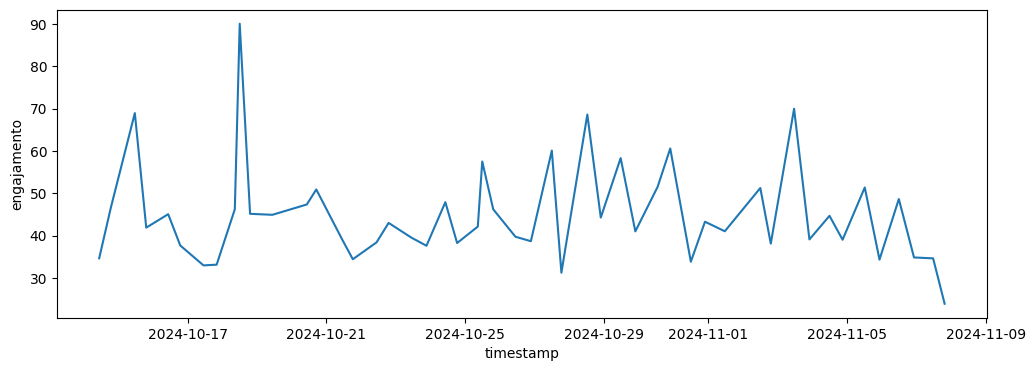

In [ ]:
# plt.figure(figsize=(12,4))
# sns.lineplot(x=ig_shotz.timestamp, y=ig_shotz.engajamento)
# plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


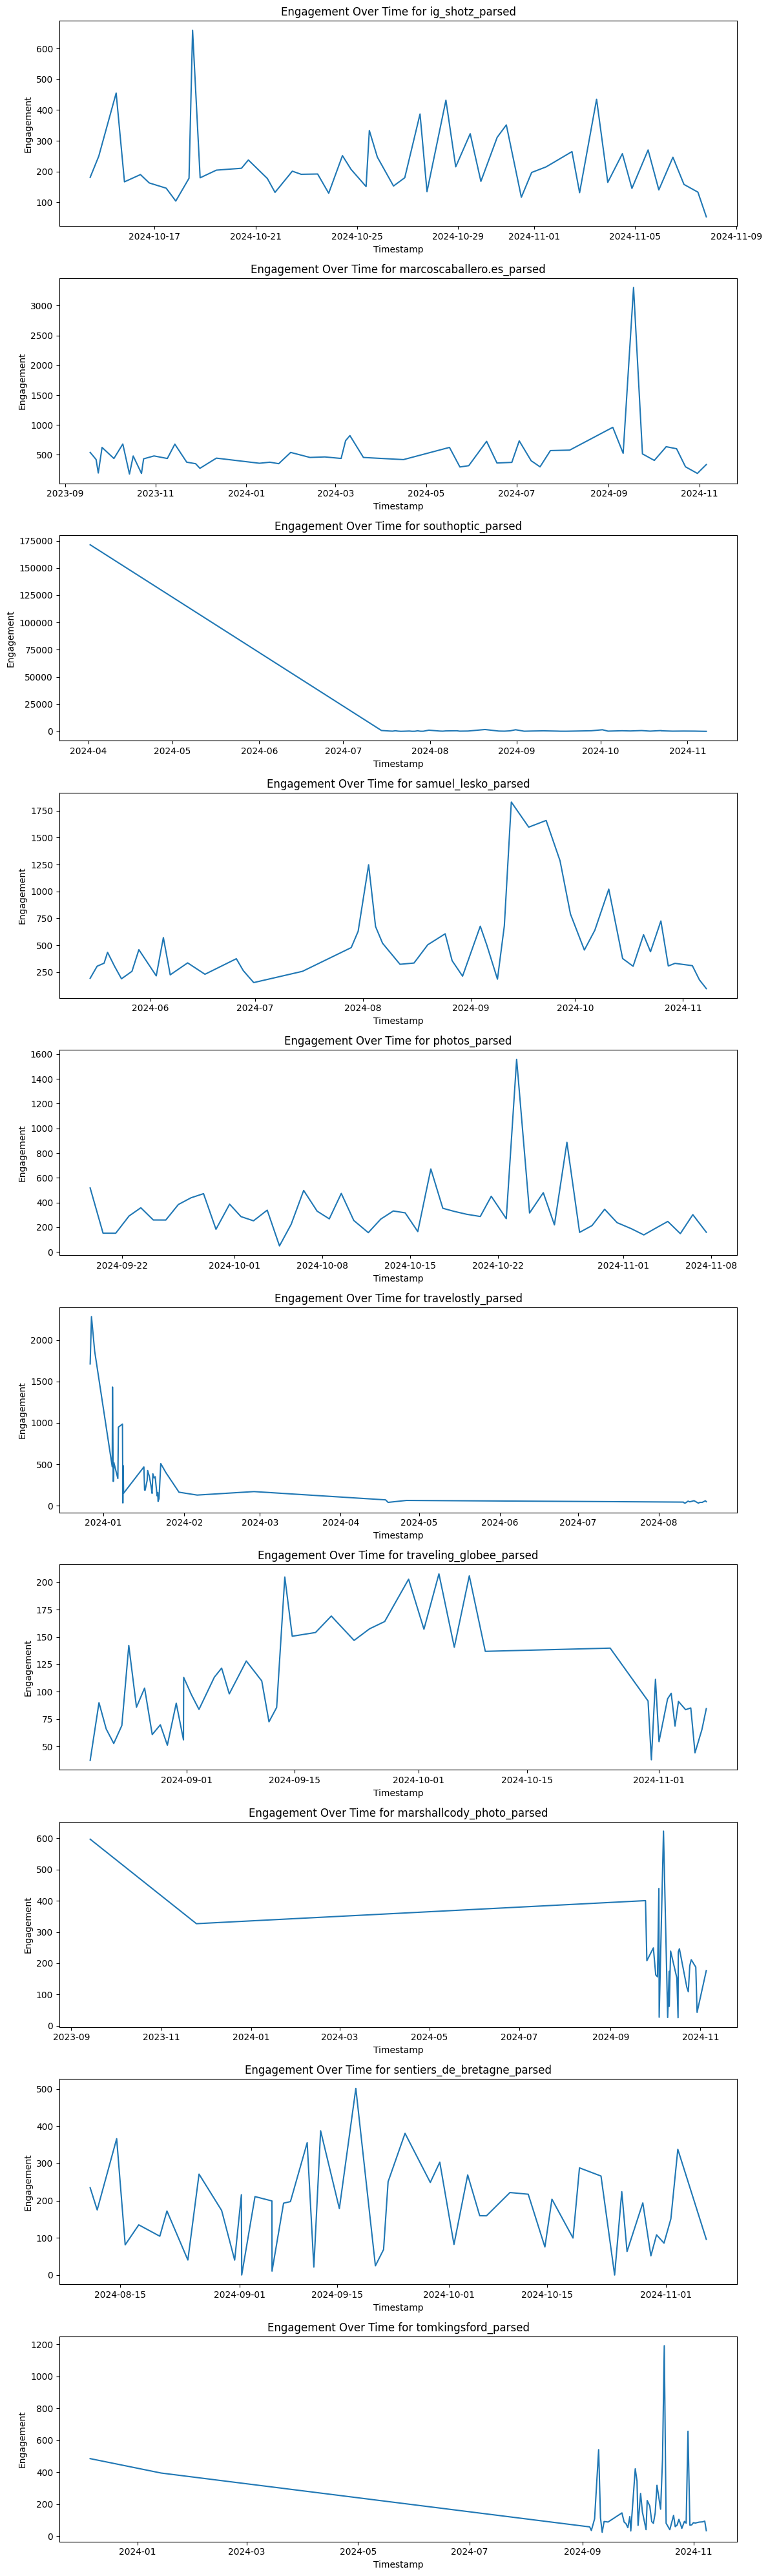

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Diretório onde os CSVs estão armazenados
csv_directory = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/"

# Dicionário para armazenar os DataFrames
dataframes = {}

# Iterar sobre todos os arquivos CSV no diretório
for file_name in os.listdir(csv_directory):
    if file_name.endswith(".csv"):
        # Criar o caminho completo do arquivo
        file_path = os.path.join(csv_directory, file_name)

        # Carregar o CSV como DataFrame
        df = pd.read_csv(file_path)

        # Calcular engajamento (média geométrica)
        df["engagement"] = np.sqrt(df["likes_count"] * df["comments_count"])

        # Converter timestamps para datetime para ordenação e plotagem
        df["timestamp"] = pd.to_datetime(df["timestamp"])

        # Ordenar pelo timestamp
        df = df.sort_values(by="timestamp")

        # Adicionar ao dicionário
        profile_name = os.path.splitext(file_name)[0]
        dataframes[profile_name] = df

# Criar subplots para visualização
n_profiles = len(dataframes)
plt.figure(figsize=(12, 4 * n_profiles))

for idx, (profile, df) in enumerate(dataframes.items(), start=1):
    plt.subplot(n_profiles, 1, idx)
    sns.lineplot(x=df["timestamp"], y=df["engagement"])
    plt.title(f"Engagement Over Time for {profile}")
    plt.xlabel("Timestamp")
    plt.ylabel("Engagement")
    plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


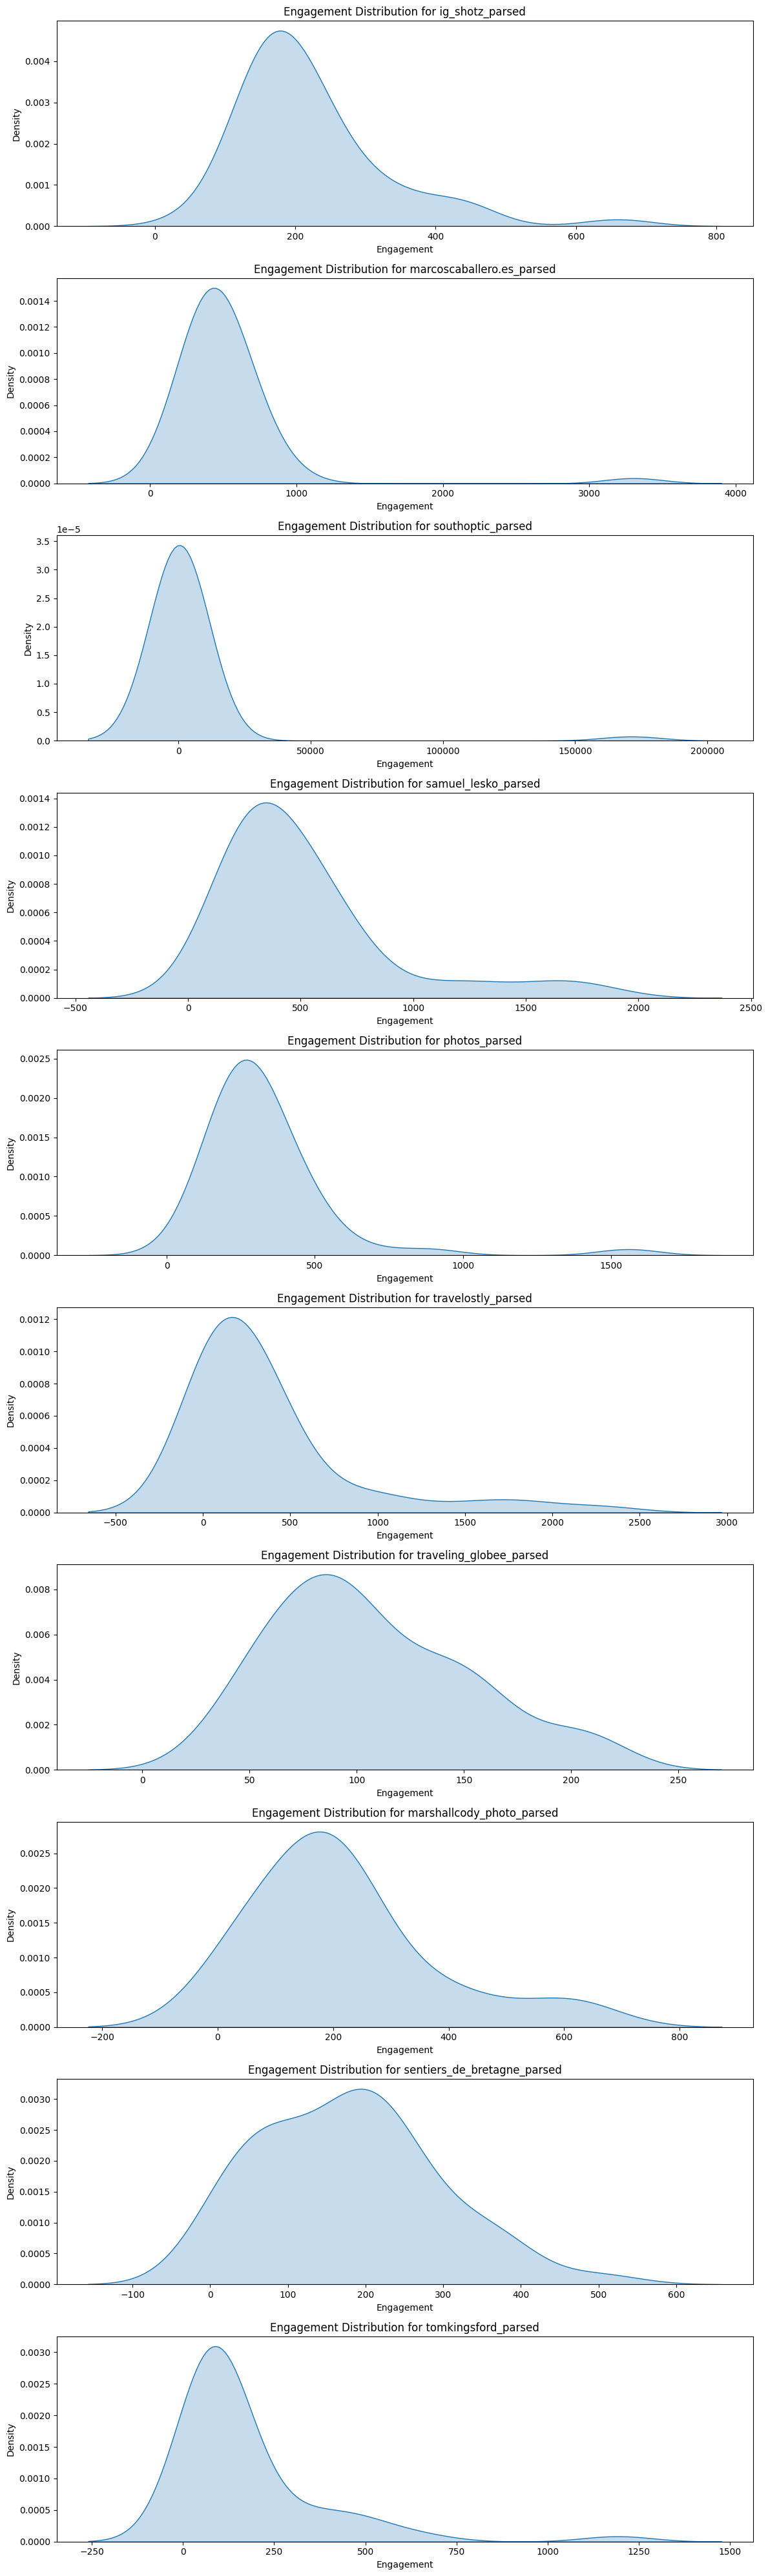

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Diretório onde os CSVs estão armazenados
csv_directory = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/"

# Dicionário para armazenar os DataFrames
dataframes = {}

# Iterar sobre todos os arquivos CSV no diretório
for file_name in os.listdir(csv_directory):
    if file_name.endswith(".csv"):
        # Criar o caminho completo do arquivo
        file_path = os.path.join(csv_directory, file_name)

        # Carregar o CSV como DataFrame
        df = pd.read_csv(file_path)

        # Calcular engajamento (média geométrica)
        df["engagement"] = np.sqrt(df["likes_count"] * df["comments_count"])

        # Adicionar ao dicionário
        profile_name = os.path.splitext(file_name)[0]
        dataframes[profile_name] = df

# Criar subplots para visualização
n_profiles = len(dataframes)
plt.figure(figsize=(12, 4 * n_profiles))

for idx, (profile, df) in enumerate(dataframes.items(), start=1):
    plt.subplot(n_profiles, 1, idx)
    sns.kdeplot(df["engagement"], fill=True)
    plt.title(f"Engagement Distribution for {profile}")
    plt.xlabel("Engagement")
    plt.ylabel("Density")
    plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


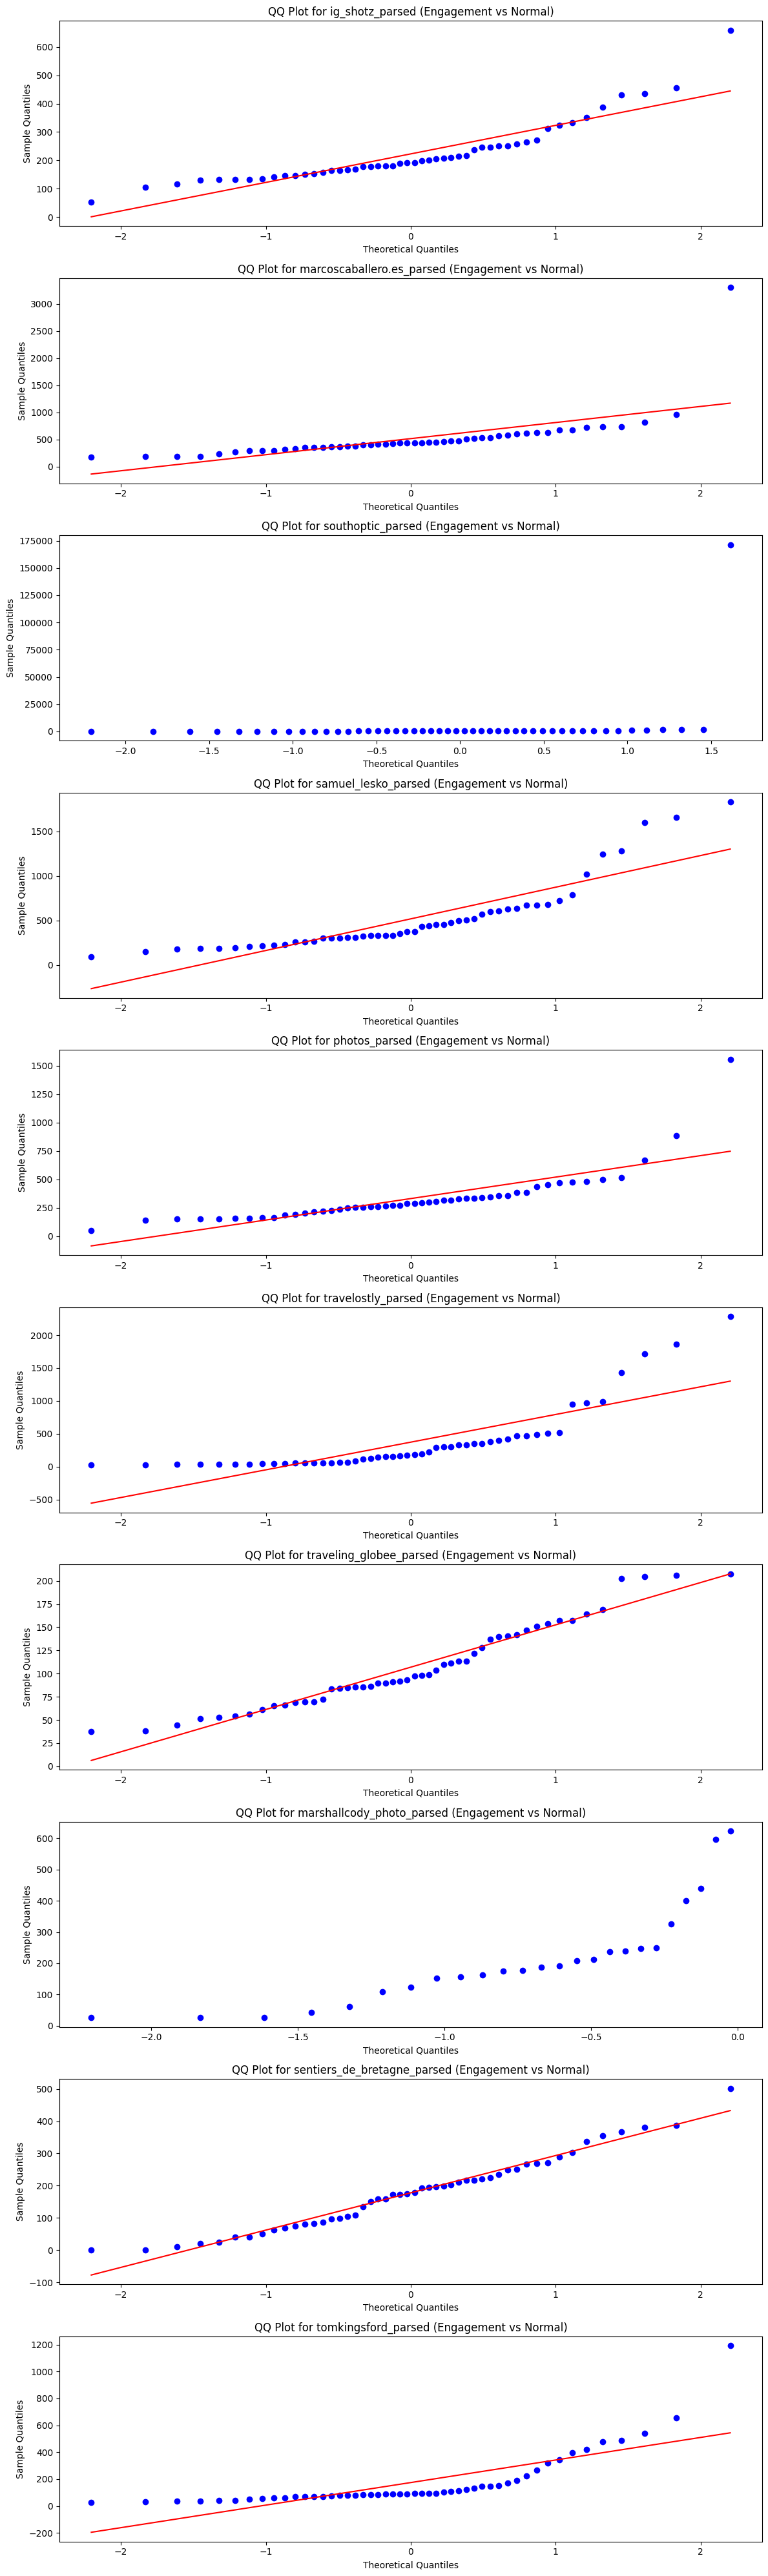

In [ ]:
from scipy import stats

# Diretório onde os CSVs estão armazenados
csv_directory = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/"

# Dicionário para armazenar os DataFrames
dataframes = {}

# Iterar sobre todos os arquivos CSV no diretório
for file_name in os.listdir(csv_directory):
    if file_name.endswith(".csv"):
        # Criar o caminho completo do arquivo
        file_path = os.path.join(csv_directory, file_name)

        # Carregar o CSV como DataFrame
        df = pd.read_csv(file_path)

        # Calcular engajamento (média geométrica)
        df["engagement"] = np.sqrt(df["likes_count"] * df["comments_count"])

        # Adicionar ao dicionário
        profile_name = os.path.splitext(file_name)[0]
        dataframes[profile_name] = df

# Criar subplots para QQ plots
n_profiles = len(dataframes)
plt.figure(figsize=(12, 4 * n_profiles))

for idx, (profile, df) in enumerate(dataframes.items(), start=1):
    plt.subplot(n_profiles, 1, idx)

    # Realizar o QQ plot
    stats.probplot(df["engagement"], dist="norm", plot=plt)

    plt.title(f"QQ Plot for {profile} (Engagement vs Normal)")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.tight_layout()

plt.show()


> Próximos Passos
- Exploração dos dados (EDA)
- Descobrir alguma forma de tornar a ETL que realmente importa automática (aluma forma de automatizar a tomada de decisão a depender do teste de normalidade, da estacionaridade, dos outiers, etc *(do engajamento)*)
- Normalizar por perfil
- Analisar resultados novamente
- Concatenar todos os dataframes em um só
- Montar ABT final
- Definir Ranking Engajamento com clusterização (qtd de estrelas = qtd de clusters)
- Pegar as imagens e cropar
- Associar imagens ao label do ranking (classificação)
- Desenvolver práticas de CNN para treinamento com os dados
- Treinar, testar, re-treinar, otimizar.., o modelo até ter um resultado aceitável
- Utilizar o streamlit pro colab para poder inserir os dados
- Tentar utilizar o Docker de alguma forma pra ter o ponto bônus